# Versionamento

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, recall_score, precision_score
import datetime

# Load Data

In [2]:
# pwbdatafile = '..\\data\\pwb-validation.csv'    # 3 breaks
# pwbdatafile = '..\\data\\pwb-validation-b1-b3.csv'    # 2 breaks
pwbdatafile = '..\\data\\pwb-validation-b1.csv'    # 1 break


pwbds = pd.read_csv(pwbdatafile)

In [3]:
pwbds.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
0,5/28/99 0:00,0,-3.787279,-17.31655,-18.198509,57.900154,0.039098,38.957985,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340184,76.346500,64.423974,-1.470630,0.011490,-100.8105,-0.006499,0
1,5/28/99 0:02,0,-3.787279,-17.31655,-18.198509,59.013069,0.035696,38.966500,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340273,78.859928,69.882226,-2.721852,0.011633,-100.8105,-0.006490,0
2,5/28/99 0:04,0,-3.787279,-17.31655,-18.198509,58.873999,0.032308,38.573860,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340364,73.129703,72.937097,-1.470630,0.011775,-100.8105,-0.006481,0
3,5/28/99 0:06,0,-3.787279,-17.31655,-18.198509,58.734901,0.028905,38.602883,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340453,76.468326,64.661676,-1.775806,0.011917,-100.8105,-0.006472,0
4,5/28/99 0:08,0,-3.787279,-17.31655,-18.198509,58.595831,0.025503,38.996651,-0.429273,-0.451141,...,-1.689041,-1.8205,1.340544,67.490543,63.351892,-2.416676,0.012059,-100.8105,-0.006463,0


In [4]:
pwbds.shape

(178, 63)

In [5]:
pwbds.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,1.780000e+02,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.0
mean,0.005618,-0.632289,-1.617618,-1.546303,42.788829,-0.127671,27.030006,-0.109545,-0.078541,0.004518,...,-1.689041e+00,-1.822633,1.357534,91.565452,52.410411,-1.317730,0.014674,-19.278009,-0.005727,0.0
std,0.074953,1.569396,7.798748,8.289476,31.539934,0.315006,24.507535,0.159607,0.187093,0.119545,...,2.226710e-16,0.008809,0.017130,33.418061,27.919045,0.407550,0.002132,40.451657,0.000431,0.0
min,0.000000,-3.787279,-17.316550,-18.198509,-35.653772,-0.639964,-33.740318,-0.429273,-0.451141,-0.120087,...,-1.689041e+00,-1.875920,1.340184,59.711978,-17.871253,-2.721852,0.010282,-100.810500,-0.006499,0.0
25%,0.000000,0.006934,1.663375,1.362543,47.608733,-0.427653,31.229141,-0.059389,-0.031206,-0.047567,...,-1.689041e+00,-1.820500,1.344173,73.210391,56.182520,-1.470630,0.013195,0.179297,-0.006101,0.0
50%,0.000000,0.076654,1.981772,2.411455,51.320746,-0.108736,32.641335,-0.039246,0.005088,-0.019986,...,-1.689041e+00,-1.820500,1.348164,78.317814,60.323252,-1.409596,0.014288,0.473188,-0.005704,0.0
75%,0.000000,0.162653,2.527768,3.031242,58.700133,0.140775,39.626129,-0.019409,0.018844,0.009922,...,-1.689041e+00,-1.820500,1.370637,84.471805,65.728906,-1.104359,0.016211,0.929386,-0.005322,0.0
max,1.000000,0.488459,3.182733,3.791828,82.497473,0.408819,59.127266,0.020874,0.088731,0.359969,...,-1.689041e+00,-1.820500,1.396549,185.373111,88.226160,0.085826,0.019538,1.330950,-0.005078,0.0


In [6]:
pwbds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 63 columns):
time    178 non-null object
y       178 non-null int64
x1      178 non-null float64
x2      178 non-null float64
x3      178 non-null float64
x4      178 non-null float64
x5      178 non-null float64
x6      178 non-null float64
x7      178 non-null float64
x8      178 non-null float64
x9      178 non-null float64
x10     178 non-null float64
x11     178 non-null float64
x12     178 non-null float64
x13     178 non-null float64
x14     178 non-null float64
x15     178 non-null float64
x16     178 non-null float64
x17     178 non-null float64
x18     178 non-null float64
x19     178 non-null float64
x20     178 non-null float64
x21     178 non-null float64
x22     178 non-null float64
x23     178 non-null float64
x24     178 non-null float64
x25     178 non-null float64
x26     178 non-null float64
x27     178 non-null float64
x28     178 non-null int64
x29     178 non-null float64
x

In [7]:
pwbds['y'].value_counts()

0    177
1      1
Name: y, dtype: int64

In [8]:
pwbds.loc[pwbds['y']==1]

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61
177,5/28/99 5:54,1,0.231069,1.183568,1.780737,74.636116,-0.406168,53.183663,-0.109135,-0.041277,...,-1.689041,-1.87592,1.396549,69.665592,82.68609,-0.616077,0.01805,1.120821,-0.005341,0


## Cálculo do Remaining Usefull Lifecycle (RUL)

In [9]:
pwbds['time']= pd.to_datetime(pwbds['time'])

# Dates whith break
df_sub = sorted(pwbds[pwbds['y'] == 1]['time'].tolist())

# variable to store all days
breakSubIdx=0
breakLstIdx=0
breakList = pwbds['y'].tolist()
nextbreak = []
for v1 in pwbds['time'].tolist():
    if((breakList[breakLstIdx] == 1)):
#        print ('1')
        nextbreak.append(v1)
        breakSubIdx = breakSubIdx+1
    else:
#        print('0')
        if (breakSubIdx < len(df_sub)):
            nextbreak.append(df_sub[breakSubIdx])
        else:
            nextbreak.append(df_sub[breakSubIdx-1])
    breakLstIdx = breakLstIdx+1
pwbds['nextbreaktime'] = pd.Series(nextbreak)
pwbds['RUL']=round((pwbds['nextbreaktime']-pwbds['time']).dt.total_seconds()/60,2)
pwbds.drop(pwbds[pwbds.RUL < 0].index, inplace=True)
pwbds.drop(['time','nextbreaktime'], axis=1, inplace=True)

In [10]:
pwbds.shape

(178, 63)

# Feature Selection and Scaling

In [11]:
# Feature Selection
# List of considered Features

FEATURES = [
    'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20',
    'x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34','x35','x36','x37','x38','x39','x40',
    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x50','x51','x52','x53','x54','x55','x56','x57','x58','x59','x60'
#]
# Redução de feature usando resultado do PCA (notebook DimRedPCAOnTS)
#    'x1','x5','x8','x10','x13','x14','x15','x17','x18','x19','x20','x21','x22','x26','x28','x30','x31','x34',
#    'x35','x37','x38','x40','x41','x43','x46','x48','x49','x51','x53','x54','x55','x58'

# Usando as features com base na sua relação com RUL
#    'x4','x24','x48','x58','x60','x42','x45','x61','x46','x49','x9','x10','x38','x17','x5','x28','x33','x41',   
#    'x13','x16','x56','x8','x12','x1','x57','x50','x44','x47','x52','x27','x37','x3','x54','x26','x2','x29','x55'

# Cj 1 - Não usar: derrubou métricas quando adicionado ao Cj 4 + Cj 6
#    'x1','x2','x4','x5','x6','x7','x10', 'x11','x13','x15','x17','x28',
#    'x1','x5','x10','x13','x14','x15',
    
# Cj 2
# Medidos sem C3:
#    'x3','x8','x10','x12','x13','x16','x18','x19','x20','x23','x25', # Precision: 0.781, Recall: 0.390, F1: 0.520
#    'x3','x8','x10','x12','x13','x16',                               # Precision: 0.834, Recall: 0.375, F1: 0.518
#    'x18','x19','x20','x23','x25',                                   # Precision: 0.980, Recall: 0.156, F1: 0.269
#    'x3','x8','x10','x18','x19','x20',                               # Precision: 0.848, Recall: 0.251, F1: 0.387
#    'x12','x13','x16','x23','x25',                                   # Precision: 0.900, Recall: 0.218, F1: 0.351
# Medidos com C3:
###    'x3','x8','x10','x12','x13','x16','x18','x19','x20','x23','x25',  # Precision: 0.735, Recall: 0.470, F1: 0.573

    # Cj 3
###   'x9','x21','x22','x24','x26','x27','x29','x30',                   # Precision: 0.735, Recall: 0.470, F1: 0.573
#    'x9','x21','x22','x24',                                          # Precision: 0.785, Recall: 0.451, F1: 0.573
#    'x26','x27','x29','x30',                                         # Precision: 0.766, Recall: 0.406, F1: 0.530
#    'x9','x21','x29','x30',                                          # Precision: 0.742, Recall: 0.353, F1: 0.478
#    'x22','x24','x26','x27',                                          # Precision: 0.801, Recall: 0.383, F1: 0.518   
    
# Cj 4
###    'x28','x36','x37','x38','x39','x40','x31','x32','x33','x34','x35',
    
# Cj 5
#    'x41','x42','x43','x44','x45','x46','x47','x48','x49','x52',

# Cj 6
###   'x50','x51','x53','x54','x55','x56','x57','x58','x59','x60'
]

# Create the dataset with features and filter the data to the list of FEATURES
pwbds_filtered = pwbds[FEATURES]

# Print the tail of the dataframe
pwbds_filtered.tail()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
173,0.093770,1.548364,1.427538,76.805824,-0.437342,54.704750,-0.039246,0.038986,0.339827,0.341767,...,28.857427,-1.689041,-1.858342,1.394207,70.724674,81.381128,-1.775806,0.016189,1.270609,-0.005283
174,0.171072,1.469117,1.564514,76.473609,-0.429545,54.055733,-0.039246,0.038986,0.349898,0.351838,...,28.849370,-1.689041,-1.862736,1.394793,70.513980,80.758081,-1.165393,0.016306,0.469042,-0.005297
175,0.225904,1.486053,1.675394,76.141425,-0.421748,54.459847,-0.039246,0.038986,0.359969,0.351838,...,28.841069,-1.689041,-1.867131,1.395378,67.627262,80.135065,-1.165393,0.016422,0.225977,-0.005312
176,0.184458,1.396350,1.757244,75.809210,-0.413950,53.661415,-0.053707,0.018273,0.260647,0.242916,...,28.833012,-1.689041,-1.871525,1.395964,62.385074,83.747827,-0.616077,0.018076,0.958323,-0.005326
177,0.231069,1.183568,1.780737,74.636116,-0.406168,53.183663,-0.109135,-0.041277,-0.120087,-0.098310,...,28.824956,-1.689041,-1.875920,1.396549,69.665592,82.686090,-0.616077,0.018050,1.120821,-0.005341


In [12]:
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler, MinMaxScaler 

# Get the number of rows in the data
nrows = pwbds_filtered.shape[0]

# Convert the data to numpy values
np_data_unscaled = np.array(pwbds_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

# Transform the data by scaling each feature to a range between 0 and 1
scaler = MinMaxScaler()
np_data_scaled = scaler.fit_transform(np_data_unscaled)
pwbds_scaled = pd.DataFrame(
    np_data_scaled,
    columns=FEATURES
)

(178, 60)


# Shaping & Splitting

In [13]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    """ Changes data to the format for LSTM training for sliding window approach """
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        
        # if index is larger than the size of the dataset, we stop
        if end_ix > x_data.shape[0]:
            break
        
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix-1]
        
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

## Dataset for Model 1

In [14]:
pwbds_m1 = pwbds_scaled.copy()
#pwbds_m1.drop('NEXT_H',axis='columns', inplace=True)
yds_m1 = pwbds.pop('RUL')

## Apply PCA

In [15]:
pwbds_m1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,0.0,0.0,0.0,0.791815,0.647476,0.782817,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.000000,0.132376,0.775657,0.445643,0.130510,0.0,0.000000
1,0.0,0.0,0.0,0.801234,0.644232,0.782908,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.001579,0.152378,0.827103,0.000000,0.145959,0.0,0.006334
2,0.0,0.0,0.0,0.800057,0.641002,0.778681,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.003193,0.106777,0.855896,0.445643,0.161301,0.0,0.012667
3,0.0,0.0,0.0,0.798880,0.637757,0.778993,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.004772,0.133346,0.777898,0.336949,0.176642,0.0,0.019001
4,0.0,0.0,0.0,0.797703,0.634514,0.783233,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.006387,0.061901,0.765553,0.108693,0.191984,0.0,0.025334


In [16]:
from sklearn.decomposition import PCA # for PCA calculation
pca = PCA()
X_pca = pca.fit(pwbds_m1)

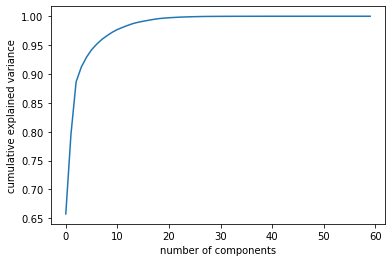

In [17]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
num_components = 40
pca = PCA(num_components)  
X_pca = pca.fit_transform(pwbds_m1) # fit and reduce dimension

In [19]:
X_pca.shape

(178, 40)

In [20]:
num_steps = 10 # Intervalo entre medições é de 2 segundos
x_new, y_new = lstm_data_transform(X_pca, yds_m1, num_steps=num_steps)
print ("The new shape of x is", x_new.shape)
print ("The new shape of y is", y_new.shape)


The new shape of x is (169, 10, 40)
The new shape of y is (169,)


In [21]:
import tensorflow as tf
from tensorflow import keras

model_m1 = keras.models.load_model('../data/pwb_regression-10stps-noavalanche-pca40-batchnormal-bidir')


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorflow\pyth

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hcord\anaconda3\envs\paper3\lib\site-pac

In [22]:
# Verify the architecture 
print(model_m1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional multiple                  154560    
_________________________________________________________________
batch_normalization (BatchNo multiple                  960       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
bidirectional_1 (Bidirection multiple                  144480    
_________________________________________________________________
batch_normalization_1 (Batch multiple                  480       
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  7

In [23]:
x_new.shape

(169, 10, 40)

In [24]:
x_new[0][0]

array([ 3.69038367e+00,  4.26492487e-01,  8.24477885e-02,  2.05119703e-01,
        3.83953545e-01,  4.83573469e-01,  6.46662760e-01,  2.08141206e-01,
       -1.59127759e-01, -4.80299751e-02,  1.40604793e-01,  1.46910480e-01,
       -1.97936416e-01,  5.29040192e-02, -1.13490724e-01, -2.47679732e-01,
       -1.66024597e-02, -6.48797480e-02,  6.88315257e-02,  7.69380749e-03,
       -3.08807692e-02, -2.02727967e-02, -4.76583029e-02, -5.76050691e-02,
        2.74749675e-02,  4.83047550e-02, -3.87204689e-02, -1.01679475e-02,
        5.97339063e-03, -1.20512632e-02, -4.45445311e-03,  1.90859441e-03,
       -8.23326440e-03,  1.17180295e-02,  4.09400048e-03,  3.62332813e-03,
        1.35002699e-02, -1.00359642e-02, -1.49792614e-02,  1.17806786e-02])

In [25]:
test_predict = model_m1.predict(x_new)

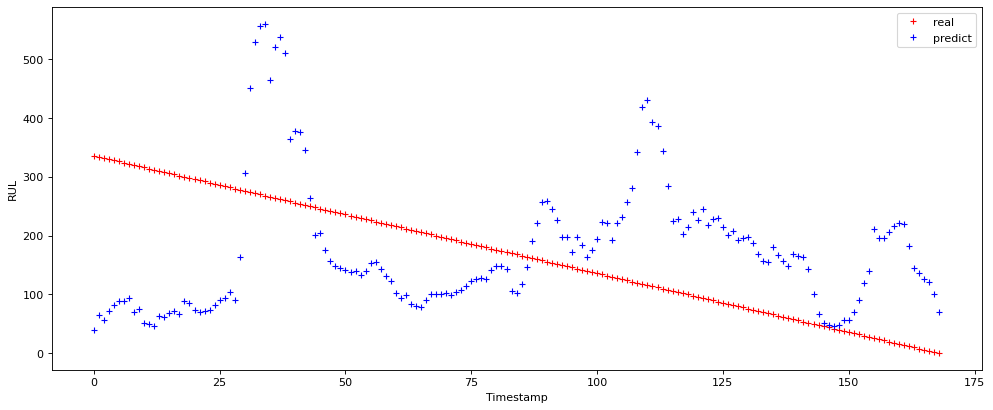

In [26]:
figure(figsize=(15, 6), dpi=80)
plt.xlabel('Timestamp')
plt.ylabel('RUL')
plt.plot(y_new,'r+',label="real")
plt.plot(test_predict,'b+',label="predict")
plt.legend(['real', 'predict'], loc='upper right')

In [27]:
import math
errordf = pd.DataFrame([])
errordf['real'] = y_new
errordf['pred']=test_predict
errordf['e_squared']=(errordf['real']-errordf['pred'])**2
errordf['e_squared']= errordf['e_squared'].astype('float')
total_rmse = math.sqrt(errordf['e_squared'].sum()/len(errordf['e_squared']))
total_rmse

151.42703924801975

## Truth

### Quantas quebras realmente ocorreram?

In [28]:
# Registro de quebras são aqueles onde RUL==0 (y_test==0)
np.unique(y_new==0,return_counts=True)

(array([False,  True]), array([168,   1], dtype=int64))

### Quando ocorreram?

In [29]:
break_moments= np.where(y_new == 1)

In [30]:
list(break_moments)

[array([], dtype=int64)]

## Previsões

### Quantas indicações abaixo de x minutos? 

In [31]:
np.unique(test_predict < 90 ,return_counts=True)

(array([False,  True]), array([133,  36], dtype=int64))

### Quando ocorreram?

In [32]:
np.where(test_predict < 90)[0]

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  63,  64,
        65, 144, 145, 146, 147, 148, 149, 150, 151, 168], dtype=int64)

## Acertos
### Quantos e quando?

In [33]:
when_pred = np.where(test_predict < 90)[0].tolist()
when_true = np.where(y_new == 0)[0].tolist()

In [34]:
commonalities = set(when_pred) - (set(when_pred) - set(when_true))

In [35]:
len(commonalities)

1

In [36]:
commonalities

{168}

In [37]:
import shap  # package used to calculate Shap values

# use Deep SHAP to explain test set predictions
#k_explainer = shap.KernelExplainer(model_1.predict_proba, x_test)
#k_shap_values = k_explainer.shap_values(x_test.reshape(14315*30,32))
#shap.force_plot(k_explainer.expected_value[1], k_shap_values[1], x_test)